In [1]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import sys, typing
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from math import erf

In [2]:
'''Returns the probability density function of the normal distribution with
mean mu and standard deviation sigma.'''
def gaussian(mu, sigma):
    return lambda x: np.exp(-x**2/(2*sigma**2)) / ((2*np.pi)**0.5 * sigma)

'''The following functions compute advantage of the membership adversary if
the test standard error is sd times the training standard error.'''
def theo_adv(sd): #known test error
    temp = sd * np.sqrt(np.log(sd) / (sd**2 - 1))
    return erf(temp) - erf(temp / sd)

def theo_adv2(sd): #unknown test error
    return erf(0.5**0.5) - erf(0.5**0.5 / sd)

def add_overfit(df):
    df['Rcv/Remp'] = df['r_cv']/df['r_emp']
    return df

In [81]:
# theoretical value
ratio = np.linspace(1.0, 20.0, num=38)
theo_advs = [theo_adv(x) for x in ratio]
theo_adv2s = [theo_adv2(x) for x in ratio]

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [63]:
# load files of error-summary
eye_known_linreg = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/linreg-summary.csv')
eye_unknown_linreg = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/linreg-summary.csv')

eye_known_tree = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/tree-summary.csv')
eye_unknown_tree = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/tree-summary.csv')

eye_known_lasso = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/lasso-summary.csv')
eye_unknown_lasso = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/lasso-summary.csv')

# eye_known_svm = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/svm-summary.csv')
# eye_unknown_svm = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/svm-summary.csv')

eye_known_sgdreg = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/sgdreg-summary-d.csv')
eye_unknown_sgdreg = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/sgdreg-summary-d.csv')
eye_known_sgdreg2 = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/sgdreg-summary.csv')
eye_unknown_sgdreg2 = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/sgdreg-summary.csv')

eye_known_knn = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/knn-summary.csv')
eye_unknown_knn = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/knn-summary.csv')

iwpc_known_linreg = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/linreg-summary.csv')
iwpc_unknown_linreg = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/linreg-summary.csv')

iwpc_known_tree = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/tree-summary.csv')
iwpc_unknown_tree = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/tree-summary.csv')

iwpc_known_lasso = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/lasso-summary.csv')
iwpc_unknown_lasso = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/lasso-summary.csv')

# iwpc_known_svm = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/svm-summary.csv')
# iwpc_unknown_svm = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/svm-summary.csv')

iwpc_known_sgdreg = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/sgdreg-summary.csv')
iwpc_unknown_sgereg = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/sgdreg-summary.csv')

iwpc_known_knn = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/knn-summary.csv')
iwpc_unknown_knn = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/knn-summary.csv')


In [73]:
models = [eye_known_linreg, eye_unknown_linreg, eye_known_tree, eye_unknown_tree, 
         eye_known_lasso, eye_unknown_lasso, 
#           eye_known_svm, eye_unknown_svm,
         eye_known_sgdreg, eye_unknown_sgdreg, eye_known_sgdreg2, eye_unknown_sgdreg2,
          eye_known_knn, eye_unknown_knn,
          iwpc_known_linreg, iwpc_unknown_linreg,iwpc_known_tree, iwpc_unknown_tree,
          iwpc_known_lasso,iwpc_unknown_lasso,
#           iwpc_known_svm, iwpc_unknown_svm, 
          iwpc_known_sgdreg, iwpc_unknown_sgereg,iwpc_known_knn, iwpc_unknown_knn]

eye_known = [eye_known_linreg, eye_known_tree, 
         eye_known_lasso,  
#              eye_known_svm, 
         eye_known_sgdreg, eye_known_knn]
         
iwpc_known = [iwpc_known_linreg, iwpc_known_tree,
        iwpc_known_lasso, 
#               iwpc_known_svm, 
         iwpc_known_sgdreg,iwpc_known_knn]

eye_unknown = [eye_unknown_linreg, eye_unknown_tree, 
          eye_unknown_lasso,  
#                eye_unknown_svm,
         eye_unknown_sgdreg, eye_unknown_knn] 

iwpc_unknown = [iwpc_unknown_linreg,iwpc_unknown_tree,
       iwpc_unknown_lasso,
#                 iwpc_unknown_svm, 
         iwpc_unknown_sgereg,iwpc_unknown_knn]

for m in models:
    m = add_overfit(m)

In [74]:
eye_unknown_sgdreg

,param,r_emp,r_cv,train_TRAIN,test_TRAIN,Rcv/Remp
0,0.0001,0.1955,0.9811,0.5180,0.2060,5.018414
1,0.0010,0.3639,0.6833,0.6786,0.3637,1.877714
2,0.0100,0.1778,0.9595,0.4938,0.2013,5.396513
3,0.1000,0.3350,0.9077,0.6913,0.3883,2.709552
4,1.0000,0.2000,0.4390,0.6637,0.5327,2.195000
5,10.0000,0.5834,0.8176,0.6802,0.6517,1.401440


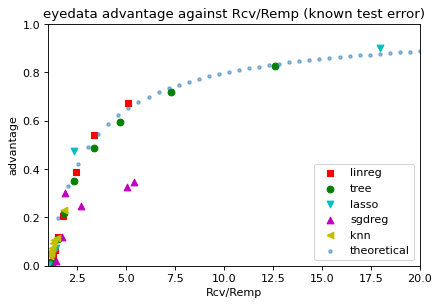

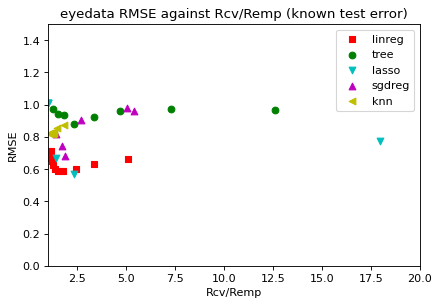

In [83]:
# eyedata_known test error

markers = [ "," , "o" , "v" , "^" , "<", ">",'s']
colors = ['r','g','c','m', 'y', 'k','b']
label = ['linreg', 'tree', 'lasso',  'sgdreg','knn']

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(eye_known)):
    df = eye_known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 20])
plt.title('eyedata advantage against Rcv/Remp (known test error)')
plt.show() 

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(eye_known)):
    df = eye_known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['r_cv'], label=label[i] , marker=mi, color=ci) 
plt.legend()
plt.xticks()
plt.ylabel('RMSE')
plt.xlabel('Rcv/Remp')
plt.xlim([1, 20])
plt.ylim([0, 1.5])
plt.title('eyedata RMSE against Rcv/Remp (known test error)')
plt.show() 

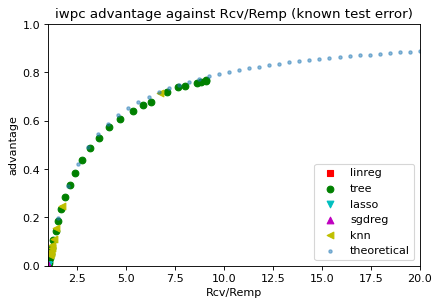

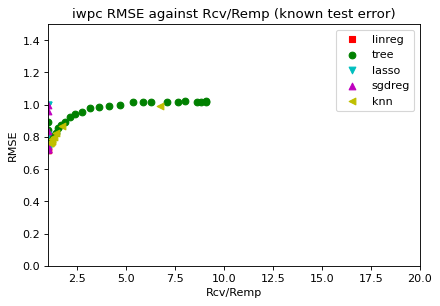

In [84]:
# iwpc_known test error

markers = [ "," , "o" , "v" , "^" , "<", ">",'s']
colors = ['r','g','c','m', 'y', 'k','b']
label = ['linreg', 'tree', 'lasso',  'sgdreg','knn']

figure( figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(0, len(iwpc_known)):
    df = iwpc_known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 20])
plt.title('iwpc advantage against Rcv/Remp (known test error)')
plt.show() 


figure(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(iwpc_known)):
    df = iwpc_known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['r_cv'], label=label[i] , marker=mi, color=ci) 
plt.legend()
plt.xticks()
plt.ylabel('RMSE')
plt.xlabel('Rcv/Remp')
plt.xlim([1, 20])
plt.ylim([0, 1.5])
plt.title('iwpc RMSE against Rcv/Remp (known test error)')
plt.show() 

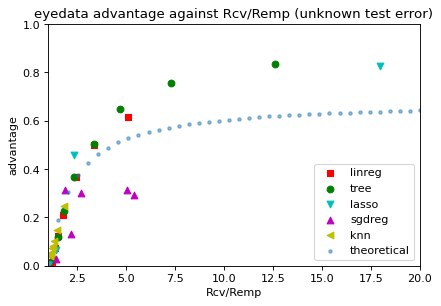

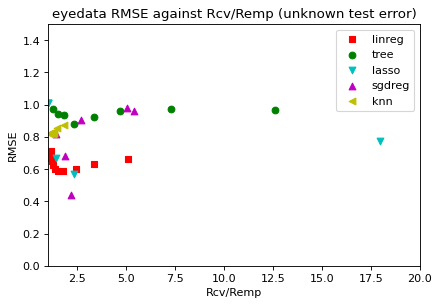

In [85]:
# eyedata_unknown test error

markers = [ "," , "o" , "v" , "^" , "<", ">",'s']
colors = ['r','g','c','m', 'y', 'k','b']
label = ['linreg', 'tree', 'lasso','sgdreg','knn']


figure( figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(eye_unknown)):
    df = eye_unknown[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']- df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_adv2s, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 20])
plt.title('eyedata advantage against Rcv/Remp (unknown test error)')
plt.show() 

figure( figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(eye_unknown)):
    df = eye_unknown[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['r_cv'], label=label[i] , marker=mi, color=ci) 
plt.legend()
plt.xticks()
plt.ylabel('RMSE')
plt.xlabel('Rcv/Remp')
plt.xlim([1, 20])
plt.ylim([0, 1.5])
plt.title('eyedata RMSE against Rcv/Remp (unknown test error)')
plt.show() 

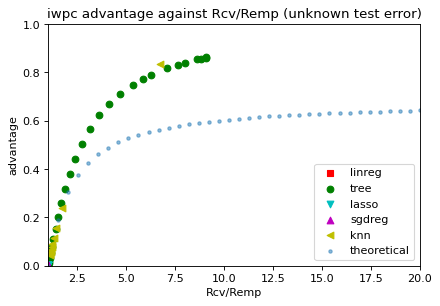

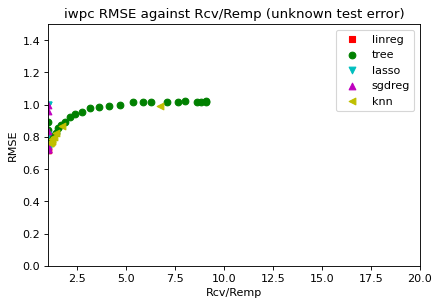

In [86]:
# eyedata_unknown test error

markers = [ "," , "o" , "v" , "^" , "<", ">",]
colors = ['r','g','c','m', 'y', 'k']
label = ['linreg', 'tree', 'lasso',  'sgdreg','knn']

figure( figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(iwpc_unknown)):
    df = iwpc_unknown[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_adv2s, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 20])
plt.title('iwpc advantage against Rcv/Remp (unknown test error)')
plt.show() 

figure( figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
for i in range(len(iwpc_known)):
    df = iwpc_unknown[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['r_cv'], label=label[i] , marker=mi, color=ci) 
plt.legend()
plt.xticks()
plt.ylabel('RMSE')
plt.xlabel('Rcv/Remp')
plt.xlim([1, 20])
plt.ylim([0, 1.5])
plt.title('iwpc RMSE against Rcv/Remp (unknown test error)')
plt.show() 

## Explore SGDRegression 

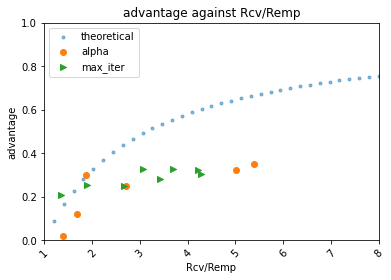

In [32]:
ax = plt.gca()
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.scatter(eye_known_sgdreg['Rcv/Remp'], eye_known_sgdreg['train_TRAIN']-eye_known_sgdreg['test_TRAIN'], label= 'alpha')
plt.scatter(eye_known_sgdreg2['Rcv/Remp'], eye_known_sgdreg2['train_TRAIN']-eye_known_sgdreg2['test_TRAIN'], label= 'max_iter',marker = '>')
plt.xticks(rotation=45)
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('advantage against Rcv/Remp')
plt.legend()

In [ ]:
ax = plt.gca()
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.scatter(eye_known_testerror['Rcv/Remp'], eye_known_testerror['train_TRAIN']-eye_known_testerror['test_TRAIN'], label= 'eyedata')
plt.scatter(iwpc_known_testerror['Rcv/Remp'], iwpc_known_testerror['train_TRAIN']-iwpc_known_testerror['test_TRAIN'],marker = '>', label= 'iwpc')
plt.xticks(rotation=45)
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('advantage against Rcv/Remp')
plt.legend()

In [ ]:
ax = plt.gca()
plt.scatter(ratio, theo_adv2s, alpha = 0.5, marker= '.', label ='theoretical')
plt.scatter(eye_unknown_testerror['Rcv/Remp'], eye_unknown_testerror['train_TRAIN']-eye_unknown_testerror['test_TRAIN'], label= 'eyedata')
plt.scatter(iwpc_unknown_testerror['Rcv/Remp'], iwpc_unknown_testerror['train_TRAIN']-iwpc_unknown_testerror['test_TRAIN'],marker = '>', label= 'iwpc')
plt.xticks(rotation=45)
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('advantage against Rcv/Remp')
plt.legend()